In [1]:
import requests
from datetime import datetime


def testStrategy(start_date: datetime, end_date: datetime, strategy: dict):
    url = "http://backtest.halfbottle.in/backtest/distributed/detailed/"
    params = {
        "start_date_day": start_date.day,
        "start_date_month": start_date.month,
        "start_date_year": start_date.year,

        "end_date_day": end_date.day,
        "end_date_month": end_date.month,
        "end_date_year": end_date.year,
    }

    response = requests.post(url, params=params, json=strategy)

    if response.status_code != 200:
        return None

    responseData = response.json()

    return responseData


In [2]:
strategy = {
    "ticker": "CNXBAN",
    "expiry": "weekly",
    "entry": {
        "included_days": [],
        "time": "13:30"
    },
    "exit": {
        "data_source": "pnl_points",
        "trailing_stoploss": {
            "base_move": -1,
            "base_stoploss": -1,
            "subsequent_move": -1,
            "subsequent_stoploss_increment": -1,
            "subsequent_stoploss_increment_change": -1,
            "final_minimum_stoploss": -1
        },
        "direction": "long",
        "take_profit": -1,
        "stoploss": -1,
        "time": "14:30"
    },
    "spread": {
        "spread_name": "Short Straddle",
        "stoploss_condition": "exit_one_leg",
        "order": [
            {
                "strike": {"strike_type": "ATM_AND_STRIKE_POINTS", "value": "ATM+0"},
                "order_side": "sell",
                "contract_type": "call",
                "stoploss_percent": 40
            },
            {
                "strike":  {"strike_type": "ATM_AND_STRIKE_POINTS", "value": "ATM+0"},
                "order_side": "sell",
                "contract_type": "put",
                "stoploss_percent": 40
            }
        ]
    }
}


In [3]:
from datetime import datetime
import time

start = time.time()

START_DATE = datetime(2019, 1, 1)
END_DATE = datetime(2019, 12, 31)

data = testStrategy(START_DATE, END_DATE, strategy)

end = time.time()

print(len(data["tradeData"]))
print(f'Total Time - {end - start}')


219
Total Time - 6.181079149246216


In [4]:
import pandas as pd

df = pd.DataFrame.from_dict(data["tradeData"])

print(df)


    underlying_ticker  leverage spread  quantity  atm_strike  entry_time  \
0              CNXBAN         1     []         1       27100  1546329600   
1              CNXBAN         1     []         1       27100  1546502400   
2              CNXBAN         1     []         1       27200  1546416000   
3              CNXBAN         1     []         1       27500  1547107200   
4              CNXBAN         1     []         1       27400  1546848000   
..                ...       ...    ...       ...         ...         ...   
214            CNXBAN         1     []         1       30900  1560326400   
215            CNXBAN         1     []         1       28000  1566288000   
216            CNXBAN         1     []         1       27800  1566374400   
217            CNXBAN         1     []         1       30200  1554364800   
218            CNXBAN         1     []         1       30000  1554451200   

      exit_time     spread_name  entry_price  exit_price  status  trading_fee  \
0     

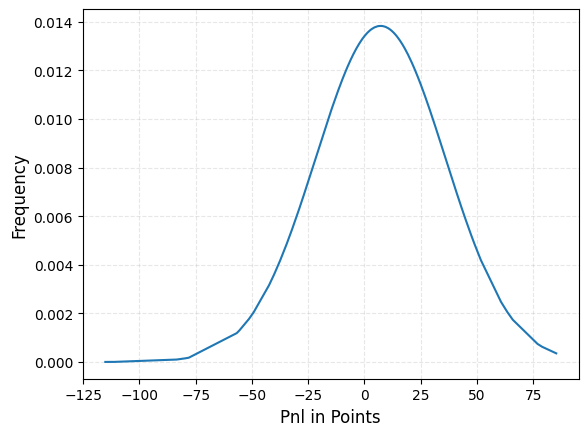

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def getLastPnl(pnl: list):
    return pnl[len(pnl) - 1]["points"]


df["last_pnl"] = df["pnl"].apply(getLastPnl)
# Calculating mean and Stdev of AGW
df_mean = np.mean(df["last_pnl"])
df_std = np.std(df["last_pnl"])

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["last_pnl"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["last_pnl"].sort_values(), pdf)
plt.xlabel("Pnl in Points", size=12)
plt.ylabel("Frequency", size=12)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()
